In [2]:
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import font_manager
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [3]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.5)
plt.rc('axes', unicode_minus=False)
from sklearn.metrics import average_precision_score, roc_auc_score
from txgnn import TxData

/dfs/user/kexinh/miniconda3/envs/txgnn_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using backend: pytorch


In [4]:
import pickle
df_res_all = []

In [5]:
from txgnn import TxData
txdata = TxData(data_folder_path = './data')
txdata.prepare_split(split = 'random', seed = 1)
id_mapping = txdata.retrieve_id_mapping()

Found local copy...
Found local copy...
Found local copy...
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


In [6]:
import glob
all_prox_list = glob.glob('output/HGT*')
for rel in ['indication', 'contraindication']:
    for split in ['autoimmune', 'metabolic_disorder', 'diabetes', 'neurodigenerative','random', 'complex_disease', 'cell_proliferation', 'mental_health', 'cardiovascular', 'anemia', 'adrenal_gland']:
        for seed in [1,2,3,4,5]:
            name = 'output/HGT_' + rel + '_' + split + '_' + str(seed) + '.pkl'
            if name not in all_prox_list:
                print(rel + '_' + split + '_' + str(seed))

In [6]:
drug_neg_dict_splits = {}
for split in ['autoimmune', 
               'metabolic_disorder', 
               'diabetes', 'neurodigenerative','random', 'complex_disease', 
               'cell_proliferation', 'mental_health',
               'cardiovascular', 'anemia', 
               'adrenal_gland']:
    drug_neg_dict = {}

    for rel in ['indication', 'contraindication']:
        seed_list = [1,2,3,4,5]
        drug_neg_dict[rel] = {}

        for seed in tqdm(seed_list):
            txdata.prepare_split(split = split, seed = seed)
            drug_neg_index = txdata.df_train[txdata.df_train.relation == 'rev_' + rel].y_idx.unique().astype(int)
            drug_neg_dict[rel][seed] = drug_neg_index
    drug_neg_dict_splits[split] = drug_neg_dict

  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:57, 44.39s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:30<02:15, 45.18s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:14<01:30, 45.00s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:00<00:45, 45.17s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:46<03:05, 46.42s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:32<02:17, 45.96s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:16<01:30, 45.07s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:01<00:45, 45.11s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:46<00:00, 45.29s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:54, 43.58s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:28<02:13, 44.51s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:12<01:28, 44.34s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:56<00:44, 44.22s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:57, 44.44s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:29<02:14, 44.81s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:14<01:29, 44.78s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:00<00:45, 45.21s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:44<00:00, 44.84s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:58, 44.71s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:29<02:14, 44.68s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:15<01:30, 45.20s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:59<00:44, 44.92s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:46<00:00, 45.21s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:54, 43.57s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:29<02:15, 45.03s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:14<01:29, 44.77s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:58<00:44, 44.78s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:57, 44.46s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:30<02:16, 45.44s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:14<01:29, 44.68s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:57<00:43, 43.98s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:44<00:00, 44.84s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 20%|█████████████████████▏                                                                                    | 1/5 [00:46<03:07, 46.91s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:32<02:18, 46.17s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:15<01:29, 44.91s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:00<00:44, 44.64s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 20%|█████████████████████▏                                                                                    | 1/5 [00:41<02:45, 41.48s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:24<02:06, 42.10s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:04<01:22, 41.34s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:45<00:41, 41.37s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:28<00:00, 41.61s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:42<02:48, 42.12s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:24<02:06, 42.05s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:07<01:25, 42.57s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:47<00:41, 41.72s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:41<02:46, 41.51s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:22<02:04, 41.37s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:04<01:23, 41.70s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:46<00:41, 41.70s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:55, 43.87s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:25<02:06, 42.27s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:07<01:25, 42.53s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:49<00:42, 42.16s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:59, 44.80s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:28<02:12, 44.15s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:13<01:28, 44.38s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:55<00:43, 43.70s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:44<02:58, 44.73s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:28<02:13, 44.41s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:14<01:30, 45.02s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:00<00:45, 45.38s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:44<00:00, 44.87s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:53, 43.39s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:27<02:11, 43.96s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:11<01:27, 43.98s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:55<00:43, 43.88s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:40<00:00, 44.06s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:46<03:04, 46.17s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:31<02:17, 45.95s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:17<01:31, 45.59s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:01<00:45, 45.16s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:52, 43.02s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:25<02:08, 42.74s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:08<01:25, 42.78s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:54<00:44, 44.12s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:41<00:00, 44.26s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:53, 43.33s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:27<02:10, 43.62s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:13<01:30, 45.03s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [02:58<00:45, 45.04s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:44<00:00, 44.87s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:46<03:04, 46.14s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:33<02:21, 47.05s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:21<01:34, 47.29s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:07<00:46, 46.68s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:48<03:15, 48.96s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:38<02:27, 49.02s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:22<01:34, 47.03s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:07<00:46, 46.28s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:52<00:00, 46.47s/it]


Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 20%|█████████████████████▏                                                                                    | 1/5 [00:49<03:16, 49.18s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:37<02:25, 48.48s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:23<01:34, 47.30s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:10<00:47, 47.32s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


  0%|                                                                                                                  | 0/5 [00:00<?, ?it/s]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 20%|█████████████████████▏                                                                                    | 1/5 [00:43<02:55, 43.88s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 40%|██████████████████████████████████████████▍                                                               | 2/5 [01:30<02:16, 45.35s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....


 60%|███████████████████████████████████████████████████████████████▌                                          | 3/5 [02:17<01:31, 45.99s/it]

Done!
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


 80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4/5 [03:05<00:46, 46.79s/it]

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:51<00:00, 46.26s/it]


In [7]:
# 'contraindication'
for rel in ['indication', 'contraindication']:
    for split in tqdm(['autoimmune', 
                       'metabolic_disorder', 
                       'diabetes', 'neurodigenerative','random', 'complex_disease', 
                       'cell_proliferation', 'mental_health',
                       'cardiovascular', 'anemia', 
                       'adrenal_gland']):
        
        seed_list = [1,2,3,4,5]
            
        for seed in seed_list:
            
            #txdata.prepare_split(split = split, seed = seed)
            #drug_neg_index = txdata.df_train[txdata.df_train.relation == 'rev_' + rel].y_idx.unique().astype(int)
            drug_neg_index = drug_neg_dict_splits[split][rel][seed]
            name = rel + '_' + split + '_' + str(seed)

            with open('output/diffusion/diffusion_' + name + '.pkl', 'rb') as f:
                disease2res = pickle.load(f)

            with open('output/HGT_' + name + '.pkl', 'rb') as f:
                disease2res_hgt = pickle.load(f)

            with open('output/HAN_' + name + '.pkl', 'rb') as f:
                disease2res_han = pickle.load(f)
            
            with open('output/ClinicalBioBERT_' + name + '.pkl', 'rb') as f:
                disease2res_bert = pickle.load(f)
            
            #if rel == 'indication':
            with open('output/proximity/proximity_' + name + '.pkl', 'rb') as f:
                disease2res_prox = pickle.load(f)
            
            with open('data/GNN_'+ str(seed)+ '_' + split + '_eval', 'rb') as f:
                disease2res_gnn = pickle.load(f)

            with open('data/TxGNN_'+ str(seed)+ '_' + split + '_eval', 'rb') as f:
                disease2res_txgnn = pickle.load(f)

            for i,j in disease2res.items():
                disease2res[i]['HGT'] = disease2res_hgt[i]
                disease2res[i]['HAN'] = disease2res_han[i]
                disease2res[i]['BioBERT'] = disease2res_bert[i]
                #if rel == 'indication':
                disease2res[i]['Proximity'] = disease2res_prox[i]
                d_id = id_mapping['idx2id_disease'][i]
                disease2res[i]['RGCN'] = {'y_pred': np.array(list(disease2res_gnn['rev_' + rel].loc[d_id].Prediction.values()))}
                disease2res[i]['TxGNN'] = {'y_pred': np.array(list(disease2res_txgnn['rev_' + rel].loc[d_id].Prediction.values()))}

            disease2idx = {}
            for d in disease2res.keys():
                np.random.seed(42)
                y = disease2res[d]['DSD-min']['y']
                y_pos_idx = np.where(y == 1)[0]
                num_hits = len(y_pos_idx)
                query_neg_options = np.intersect1d(np.where(y != 1)[0], drug_neg_index)
                y_neg_idx = np.random.choice(query_neg_options, num_hits)
                disease2idx[d] = (y_pos_idx, y_neg_idx)
            
            
            #method_list = ['DSD-min', 'KL-med', 'KL-min', 'JS-med', 'JS-min', 'Proximity' , 'HGT', 'HAN', 'RGCN', 'BioBERT', 'TxGNN']
            method_list = ['DSD-min', 'KL-min', 'JS-min', 'HGT', 'HAN', 'RGCN', 'BioBERT', 'TxGNN']
            
            method_list.append('Proximity') 
            
            for method in method_list:
                pos_pred_all = []
                neg_pred_all = []
                recall_100_all = []
                precision_100_all = []
                precision_10_all = []
                precision_K_all = []

                avg_rank_all = []
                for d in disease2res.keys():
                    pos_pred = disease2res[d][method]['y_pred'][disease2idx[d][0]].tolist()
                    neg_pred = disease2res[d][method]['y_pred'][disease2idx[d][1]].tolist()
                    pos_pred_all += pos_pred
                    neg_pred_all += neg_pred
                    recall_100_all.append(len(np.intersect1d(np.argsort(disease2res[d][method]['y_pred'])[::-1][:100], disease2idx[d][0]))/len(disease2idx[d][0]))
                    precision_100_all.append(len(np.intersect1d(np.argsort(disease2res[d][method]['y_pred'])[::-1][:100], disease2idx[d][0]))/100)
                    precision_10_all.append(len(np.intersect1d(np.argsort(disease2res[d][method]['y_pred'])[::-1][:10], disease2idx[d][0]))/10)
                    precision_K_all.append(len(np.intersect1d(np.argsort(disease2res[d][method]['y_pred'])[::-1][:len(disease2idx[d][0])], disease2idx[d][0]))/len(disease2idx[d][0]))
                    avg_rank_all.append(np.mean(np.argsort(np.argsort(disease2res[d][method]['y_pred']))[disease2idx[d][0]])/len(disease2res[d][method]['y_pred']))
                    
                auprc = average_precision_score([1]*len(pos_pred_all) + [0] * len(neg_pred_all), pos_pred_all + neg_pred_all)
                auroc = roc_auc_score([1]*len(pos_pred_all) + [0] * len(neg_pred_all), pos_pred_all + neg_pred_all)
                df_res_all.append((method, auprc, seed, split, rel, 'AUPRC'))
                df_res_all.append((method, auroc, seed, split, rel, 'AUROC'))
                df_res_all.append((method, np.mean(recall_100_all), seed, split, rel, 'Recall@100'))
                df_res_all.append((method, np.mean(avg_rank_all), seed, split, rel, 'Avg Rank'))
                df_res_all.append((method, np.mean(precision_100_all), seed, split, rel, 'Precision@100'))
                df_res_all.append((method, np.mean(precision_10_all), seed, split, rel, 'Precision@10'))
                df_res_all.append((method, np.mean(precision_K_all), seed, split, rel, 'Precision@K'))


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:30<00:00, 24.63s/it]


In [22]:
split_to_name = {
    'random': 'Random Disease Split', 
    'complex_disease': 'Zero-shot Disease Split', 
    'cell_proliferation': 'Disease Area Split: Cell Proliferation', 
    'mental_health': 'Disease Area Split: Mental Health', 
    'cardiovascular': 'Disease Area Split: Cardiovascular', 
    'anemia': 'Disease Area Split: Anemia', 
    'adrenal_gland': 'Disease Area Split: Adrenal Gland',
    'autoimmune': 'Disease Area Split: Autoimmune', 
    'metabolic_disorder': 'Disease Area Split: Metabolic Disorder', 
    'diabetes': 'Disease Area Split: Diabetes', 
    'neurodigenerative': 'Disease Area Split: Neurodegenerative', 
}

In [9]:
df_res_all_pd = pd.DataFrame(df_res_all).rename(columns = {0: 'Method', 1: 'Metric', 2: 'Seed', 3: 'Split', 4: 'Task', 5: 'Metric Name'})


In [10]:
df_res_all_pd.to_csv('result_more_metrics.csv', index = False)

In [11]:
df_res_all_pd[(df_res_all_pd.Split == 'complex_disease') & (df_res_all_pd.Method == 'TxGNN') & (df_res_all_pd['Metric Name'] == 'AUPRC')]

,Method,Metric,Seed,Split,Task,Metric Name
1624,TxGNN,0.893151,1,complex_disease,indication,AUPRC
1687,TxGNN,0.861102,2,complex_disease,indication,AUPRC
1750,TxGNN,0.915865,3,complex_disease,indication,AUPRC
1813,TxGNN,0.927871,4,complex_disease,indication,AUPRC
1876,TxGNN,0.919800,5,complex_disease,indication,AUPRC
5089,TxGNN,0.821891,1,complex_disease,contraindication,AUPRC
5152,TxGNN,0.794744,2,complex_disease,contraindication,AUPRC
5215,TxGNN,0.788688,3,complex_disease,contraindication,AUPRC
5278,TxGNN,0.816145,4,complex_disease,contraindication,AUPRC
5341,TxGNN,0.791551,5,complex_disease,contraindication,AUPRC


Random Disease Split


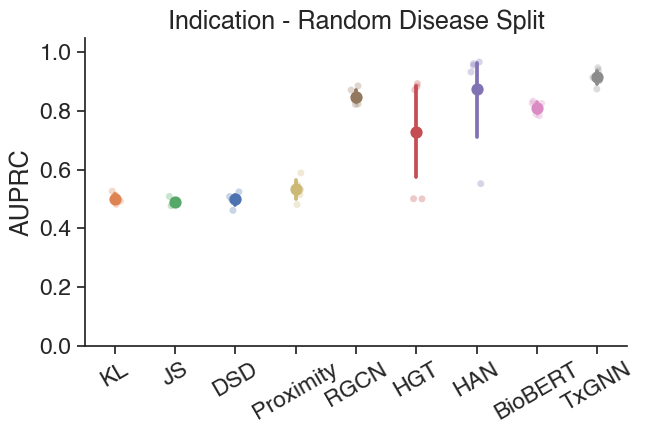

Zero-shot Disease Split


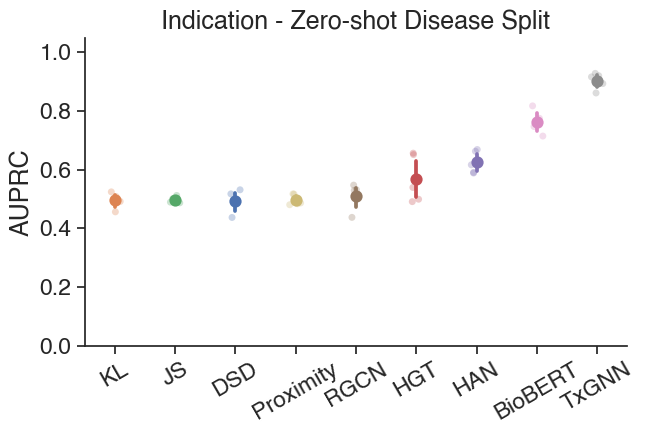

Disease Area Split: Cell Proliferation


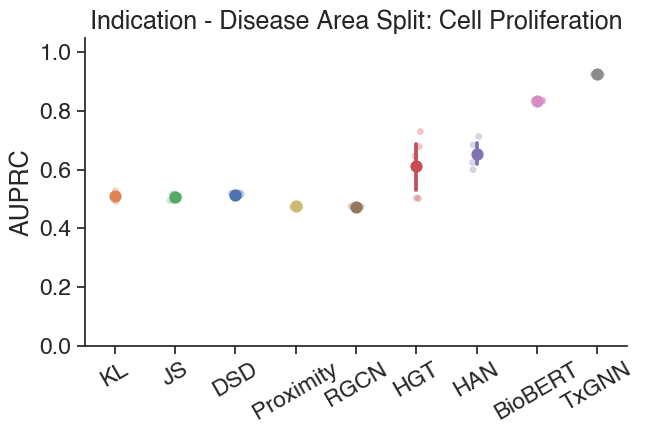

Disease Area Split: Mental Health


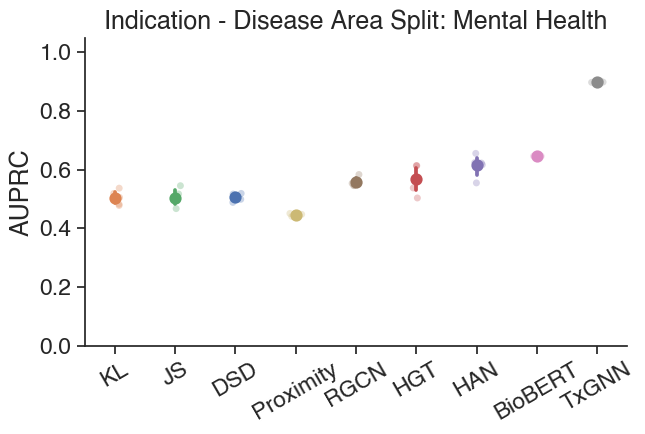

Disease Area Split: Cardiovascular


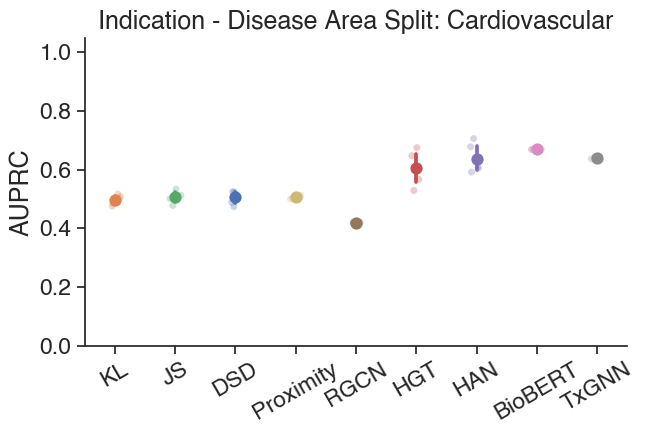

Disease Area Split: Anemia


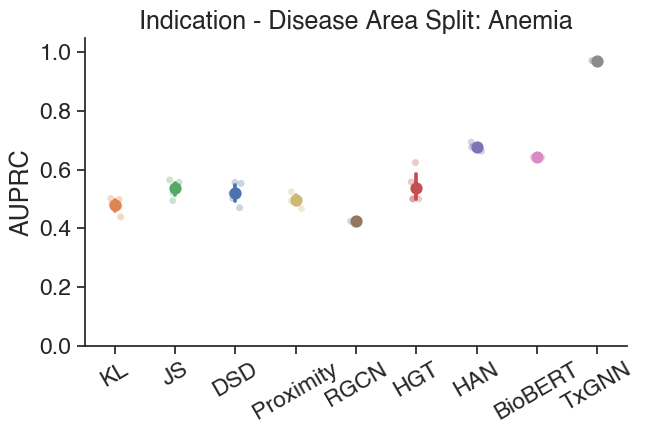

Disease Area Split: Adrenal Gland


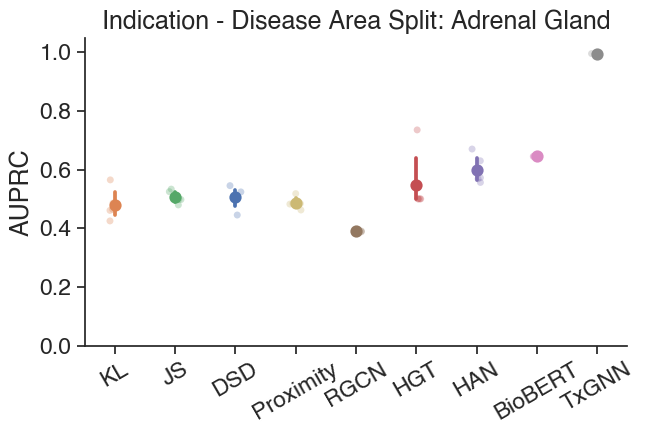

Disease Area Split: Autoimmune


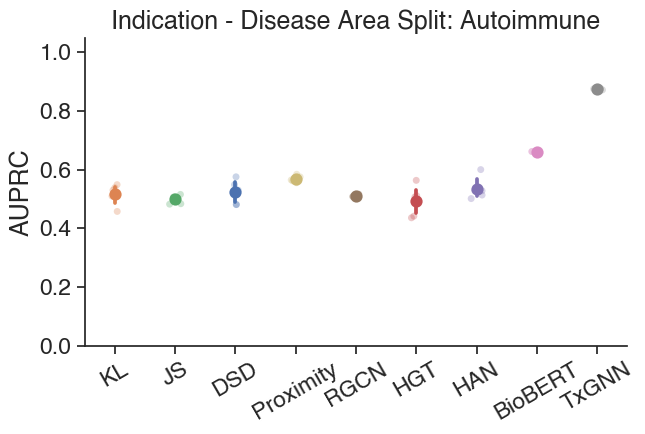

Disease Area Split: Metabolic Disorder


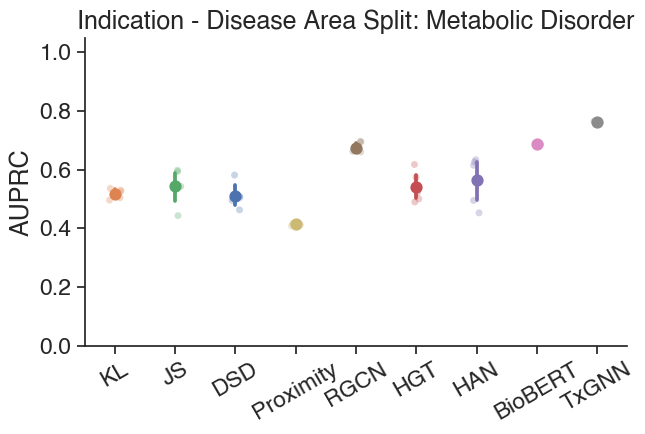

Disease Area Split: Diabetes


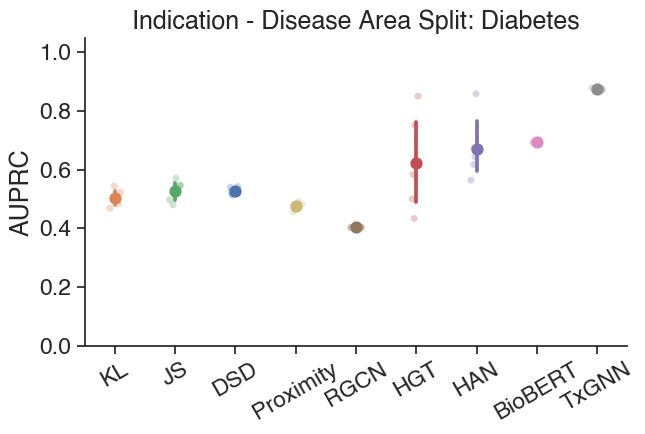

Disease Area Split: Neurodegenerative


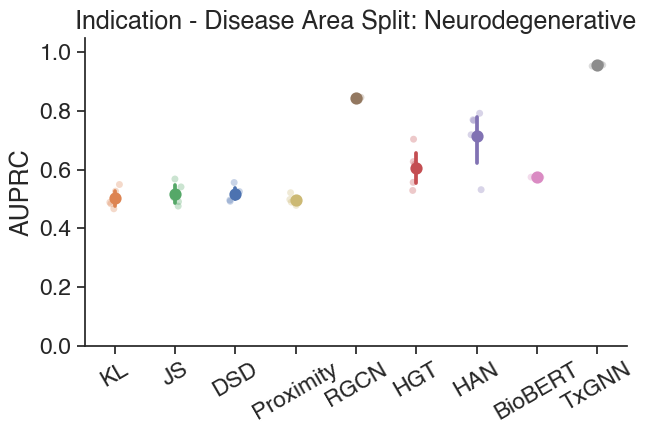

In [12]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.5)
plt.rc('axes', unicode_minus=False)

rel = 'indication'
for split in ['random', 'complex_disease', 'cell_proliferation', 'mental_health', 
              'cardiovascular', 'anemia', 'adrenal_gland', 'autoimmune', 
              'metabolic_disorder', 'diabetes', 'neurodigenerative']:
    df_res_all_pd['Method'] = df_res_all_pd.Method.apply(lambda x: x.split('-')[0] if len(x.split('-')) > 1 else x)
    df_metric = df_res_all_pd[(df_res_all_pd.Task == rel) & (df_res_all_pd.Split == split)]
    print(split_to_name[split])
    sns.stripplot(data = df_metric[df_metric['Metric Name'] == 'AUPRC'], x = 'Method', y = 'Metric', hue = 'Method', 
                  order = ['KL', 'JS', 'DSD', 'Proximity', 'RGCN', 'HGT', 'HAN', 'BioBERT', 'TxGNN'], alpha = 0.3)
    g = sns.pointplot(data = df_metric[df_metric['Metric Name'] == 'AUPRC'], x = 'Method', y = 'Metric', hue = 'Method', 
                  order = ['KL', 'JS', 'DSD', 'Proximity', 'RGCN', 'HGT', 'HAN', 'BioBERT', 'TxGNN'])
    g.set(xlabel = '', ylabel = 'AUPRC',  ylim = (0,1.05), title = rel.capitalize() + ' - ' + split_to_name[split])
    sns.despine()
    g.legend_.remove()
    plt.xticks(rotation=30)
    plt.show()


Random Disease Split


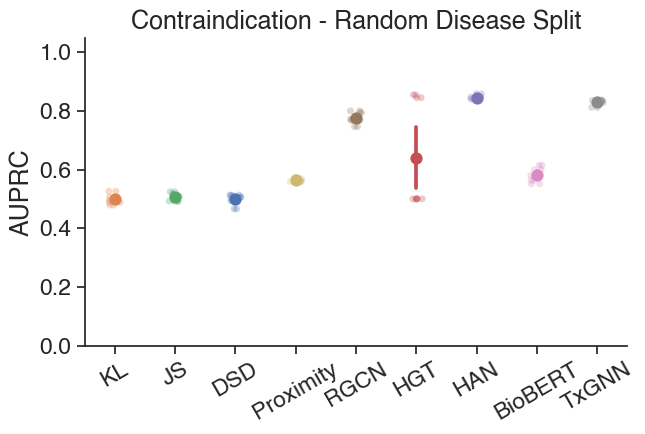

Zero-shot Disease Split


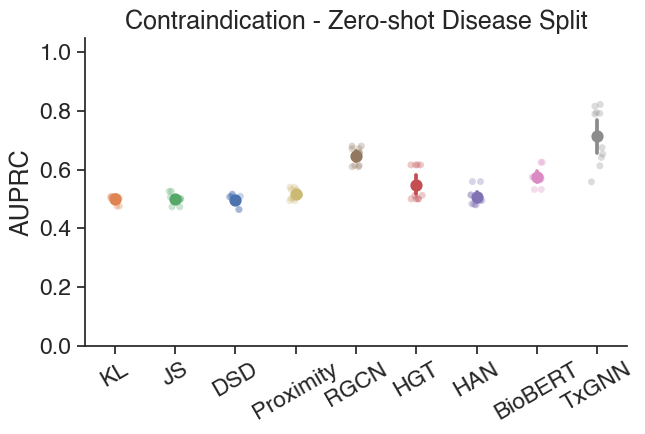

Disease Area Split: Cell Proliferation


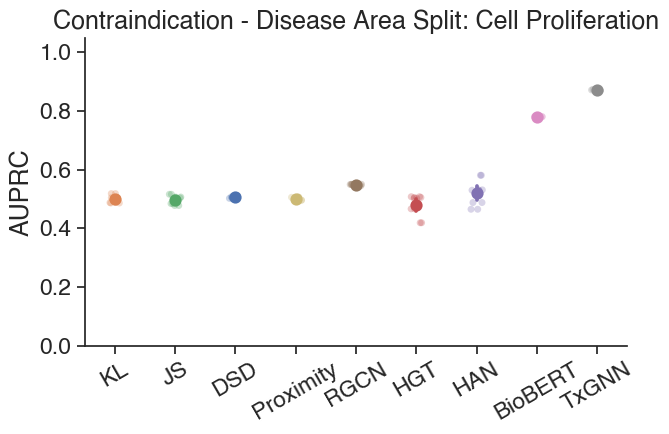

Disease Area Split: Mental Health


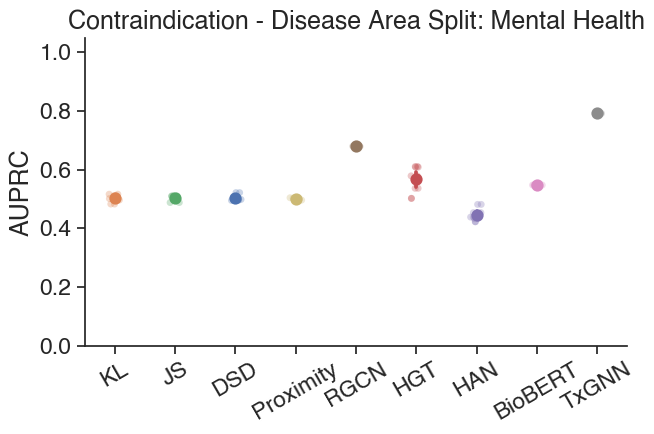

Disease Area Split: Cardiovascular


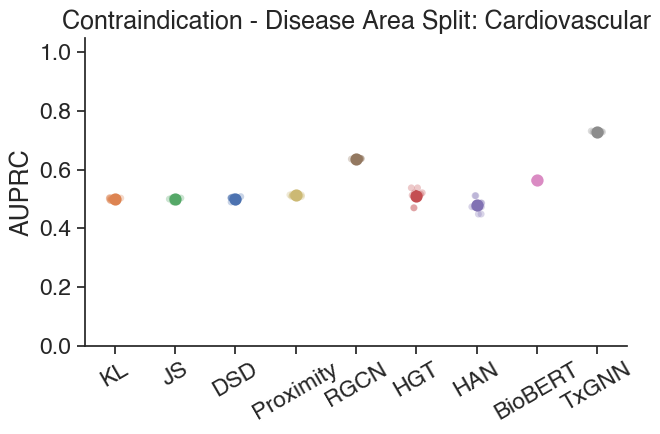

Disease Area Split: Anemia


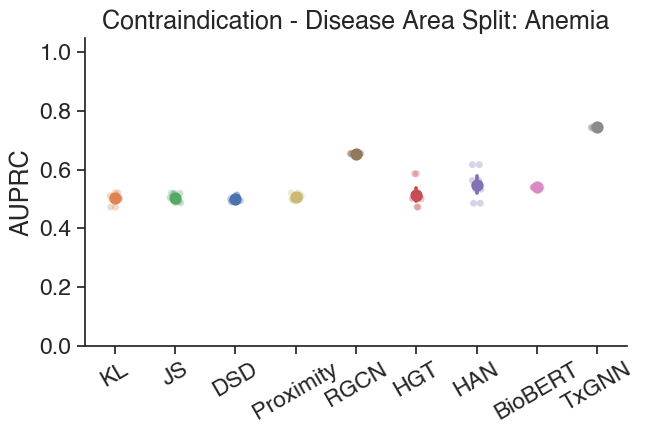

Disease Area Split: Adrenal Gland


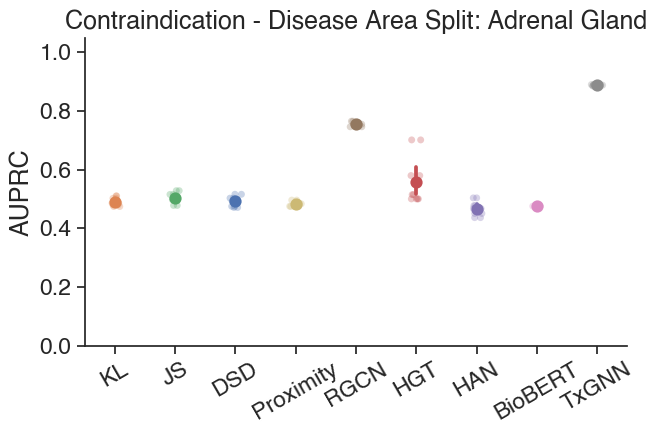

Disease Area Split: Autoimmune


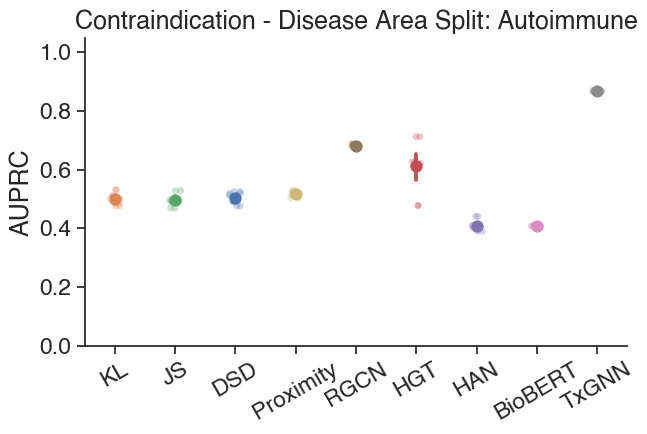

Disease Area Split: Metabolic Disorder


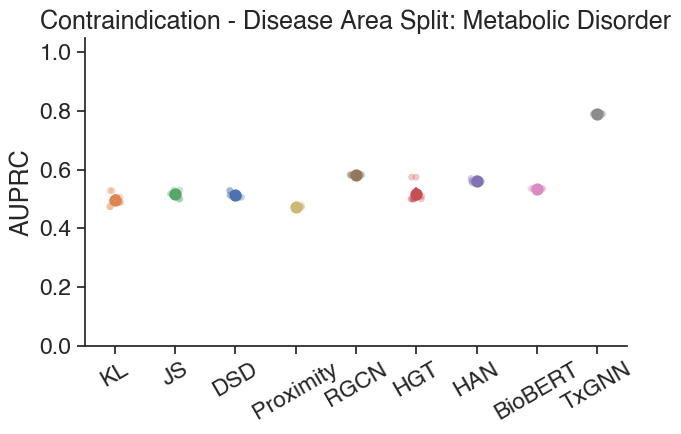

Disease Area Split: Diabetes


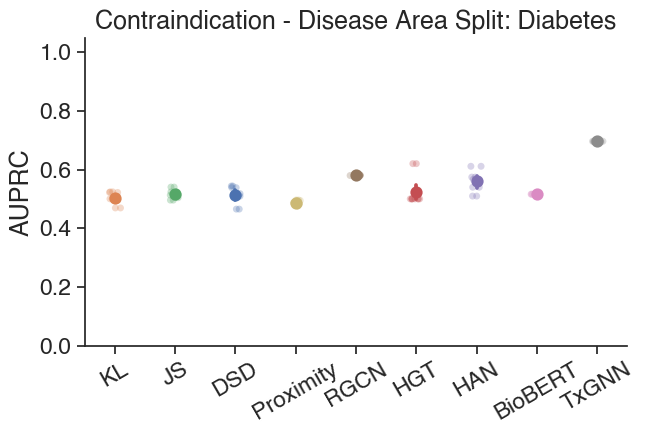

Disease Area Split: Neurodegenerative


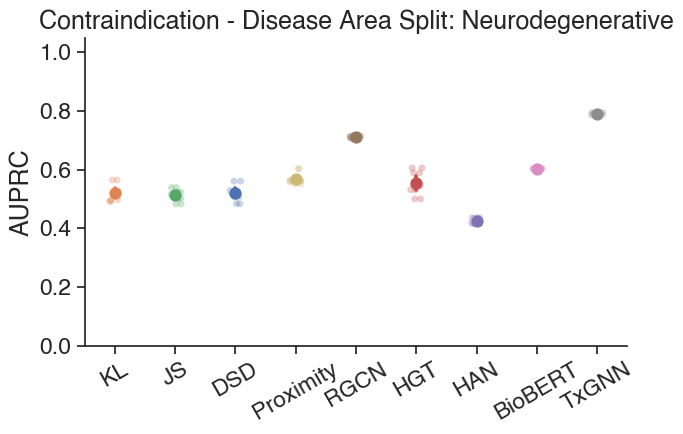

In [54]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.5)
plt.rc('axes', unicode_minus=False)

rel = 'contraindication'
for split in ['random', 'complex_disease', 'cell_proliferation', 'mental_health', 
              'cardiovascular', 'anemia', 'adrenal_gland', 'autoimmune', 
              'metabolic_disorder', 'diabetes', 'neurodigenerative']:
    df_res_all_pd['Method'] = df_res_all_pd.Method.apply(lambda x: x.split('-')[0] if len(x.split('-')) > 1 else x)
    df_metric = df_res_all_pd[(df_res_all_pd.Task == rel) & (df_res_all_pd.Split == split)]
    print(split_to_name[split])
    sns.stripplot(data = df_metric[df_metric['Metric Name'] == 'AUPRC'], x = 'Method', y = 'Metric', hue = 'Method', 
                  order = ['KL', 'JS', 'DSD', 'Proximity', 'RGCN', 'HGT', 'HAN', 'BioBERT', 'TxGNN'], alpha = 0.3)
    g = sns.pointplot(data = df_metric[df_metric['Metric Name'] == 'AUPRC'], x = 'Method', y = 'Metric', hue = 'Method', 
                  order = ['KL', 'JS', 'DSD', 'Proximity', 'RGCN', 'HGT', 'HAN', 'BioBERT', 'TxGNN'])
    g.set(xlabel = '', ylabel = 'AUPRC',  ylim = (0,1.05), title = rel.capitalize() + ' - ' + split_to_name[split])
    sns.despine()
    g.legend_.remove()
    plt.xticks(rotation=30)
    plt.show()


In [13]:
for split in ['random', 'complex_disease', 'cell_proliferation', 'mental_health', 'cardiovascular', 'anemia', 'adrenal_gland']:
    print(split)
    df_res_all_pd['Method'] = df_res_all_pd.Method.apply(lambda x: x.split('-')[0] if len(x.split('-')) > 1 else x)
    df_metric = df_res_all_pd[(df_res_all_pd.Task == rel) & (df_res_all_pd.Split == split)]

    print(df_metric[df_metric['Metric Name'] == 'AUPRC'].groupby('Method').Metric.agg(np.mean))

random
Method
BioBERT      0.811493
DSD          0.498108
HAN          0.873351
HGT          0.729618
JS           0.490240
KL           0.501032
Proximity    0.532823
RGCN         0.847963
TxGNN        0.915271
Name: Metric, dtype: float64
complex_disease
Method
BioBERT      0.761034
DSD          0.492888
HAN          0.625055
HGT          0.567098
JS           0.496130
KL           0.494607
Proximity    0.496607
RGCN         0.508866
TxGNN        0.903558
Name: Metric, dtype: float64
cell_proliferation
Method
BioBERT      0.834935
DSD          0.514089
HAN          0.654522
HGT          0.611725
JS           0.505947
KL           0.510167
Proximity    0.474272
RGCN         0.473280
TxGNN        0.925505
Name: Metric, dtype: float64
mental_health
Method
BioBERT      0.645849
DSD          0.505578
HAN          0.614420
HGT          0.566888
JS           0.503833
KL           0.503904
Proximity    0.445875
RGCN         0.556377
TxGNN        0.898809
Name: Metric, dtype: float64
cardiova